# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [127]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [129]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
def display_clusters(X,km,num_clusters):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)            

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



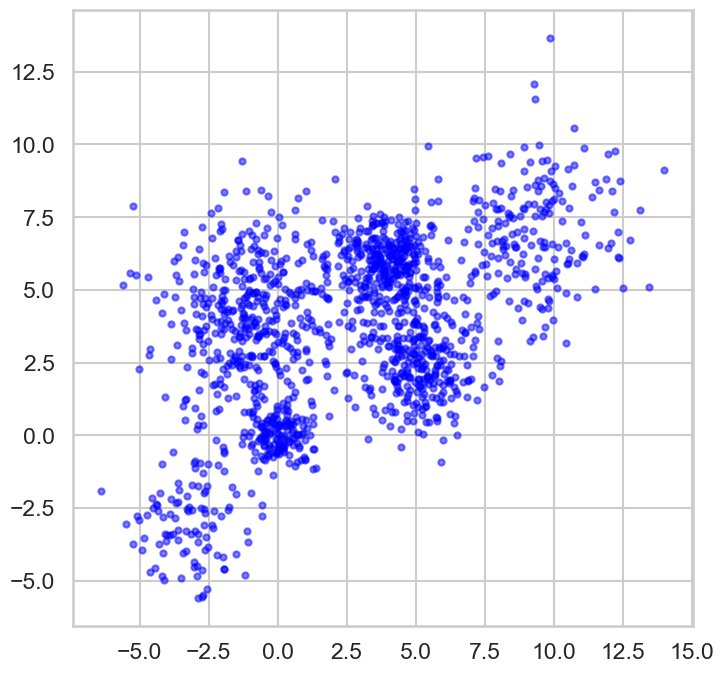

In [132]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data,0)

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

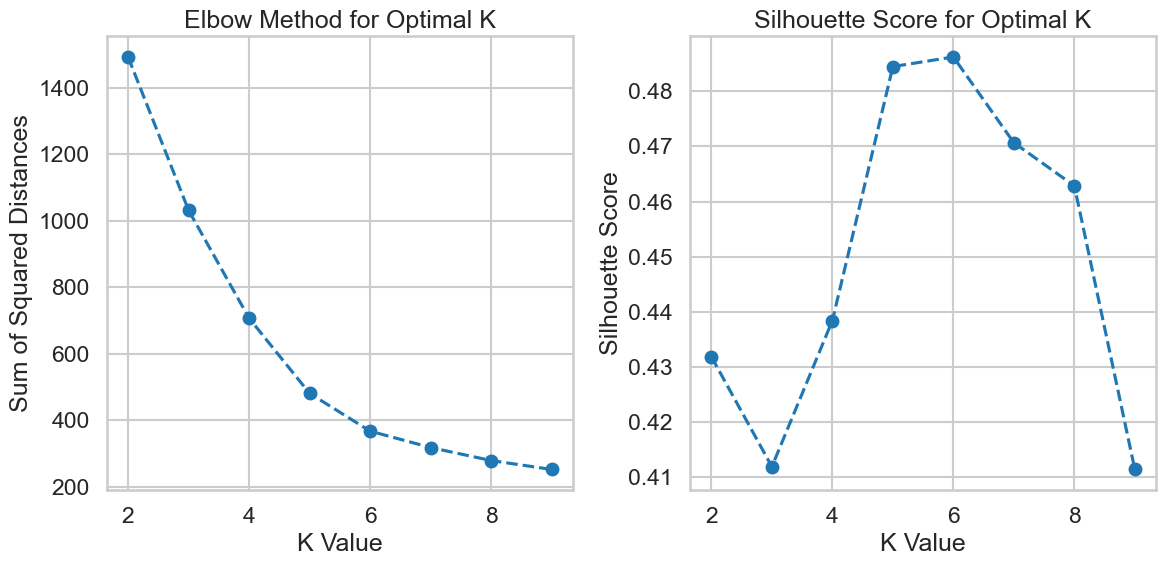

In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ssd = []
silhouette_scores = []

# Your code here
for k in range(2, 10):
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(scaled_df)
    
    # Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    
    # Calculate silhouette score
    labels = model.labels_
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# Plot SSD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal K")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")

plt.tight_layout()
plt.show()

Silhouette Score for K-Means++ (K=6): 0.4863


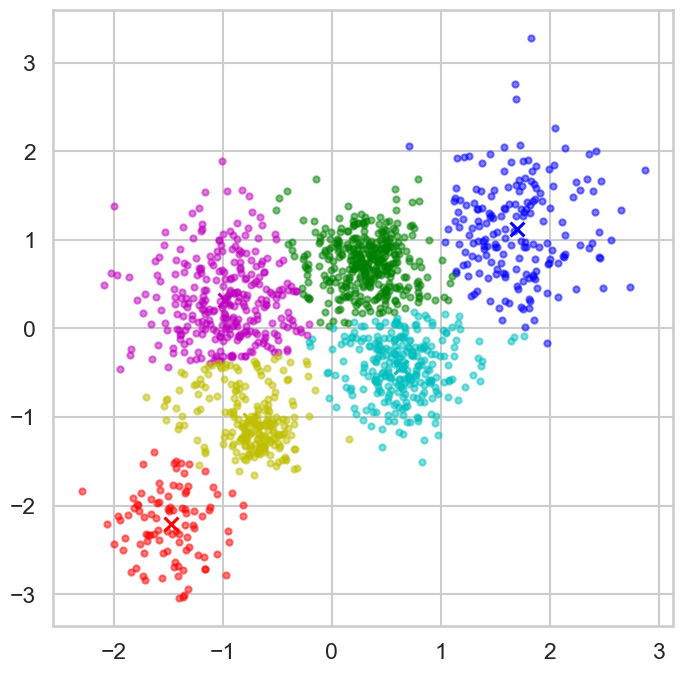

In [138]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Train K-Means++ with the optimal K
k_optimal = 6
kmeans = KMeans(n_clusters=k_optimal, init='k-means++')
kmeans.fit(scaled_df)

# Get cluster labels
labels = kmeans.labels_

# Compute Silhouette Score
silhouette = silhouette_score(scaled_df, labels)
print(f"Silhouette Score for K-Means++ (K={k_optimal}): {silhouette:.4f}")



# Display clusters
display_cluster(scaled_df, km=kmeans, num_clusters=k_optimal)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

Best Agglomerative Clustering Model: {'distance_threshold': 11.517241379310345, 'affinity': 'euclidean', 'linkage': 'ward', 'num_clusters': 6}
Best Silhouette Score: 0.4653
Number of Clusters in Best Model: 6


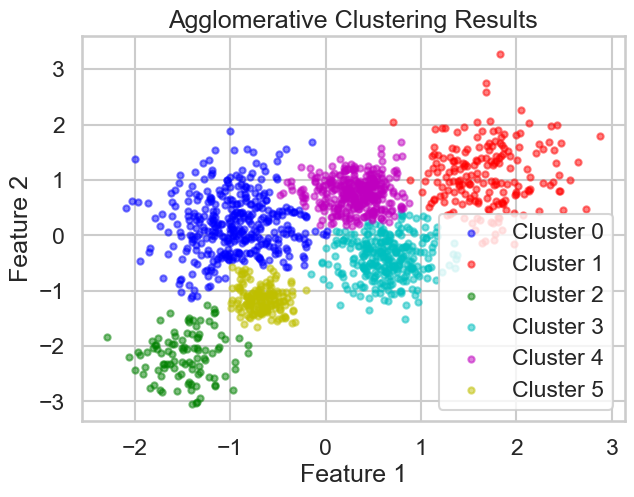

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Define parameter search space
affinity_list = ["euclidean", "manhattan", "cosine"]
linkage_list = ["ward", "average", "complete", "single"]
distance_thresholds = np.linspace(5, 14, 30)  # 15 different thresholds

# Store best parameters
best_score = -1
best_params = {}

# Iterate over different configurations
for distance_threshold in distance_thresholds:
    for affinity in affinity_list:
        for linkage in linkage_list:
            if linkage == "ward" and affinity != "euclidean":
                continue  
            
            # Fit Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=None, 
                                            distance_threshold=distance_threshold,
                                            affinity=affinity, 
                                            linkage=linkage)
            labels = model.fit_predict(scaled_df)
            
            # Count number of clusters
            num_clusters = len(set(labels))
            
            # Skip invalid clustering results
            if num_clusters <= 1:
                continue
            
            # Compute Silhouette Score
            silhouette = silhouette_score(scaled_df, labels)

            # Update best model
            if silhouette > best_score:
                best_score = silhouette
                best_params = {
                    "distance_threshold": distance_threshold, 
                    "affinity": affinity, 
                    "linkage": linkage,
                    "num_clusters": num_clusters
                }

# Print best model parameters and number of clusters
print(f"Best Agglomerative Clustering Model: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Number of Clusters in Best Model: {best_params['num_clusters']}")

# Store the best silhouette score for comparison
best_hierarchical_score = best_score

# Train best model
best_model = AgglomerativeClustering(n_clusters=None, 
                                     distance_threshold=best_params["distance_threshold"],  
                                     affinity=best_params["affinity"], 
                                     linkage=best_params["linkage"])
labels = best_model.fit_predict(scaled_df)


def display_clusters(X, labels, num_clusters):
    color = 'brgcmyk'  # List of colors
    alpha = 0.5  
    s = 20  # Point size
    
    plt.figure(figsize=(7, 5))
    
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[labels == i, 0], X[labels == i, 1], c=color[i], alpha=alpha, s=s, label=f'Cluster {i}')
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Agglomerative Clustering Results")
    plt.legend()
    plt.show()

# Call the function using best clustering parameters
display_clusters(scaled_df, labels, best_params["num_clusters"])



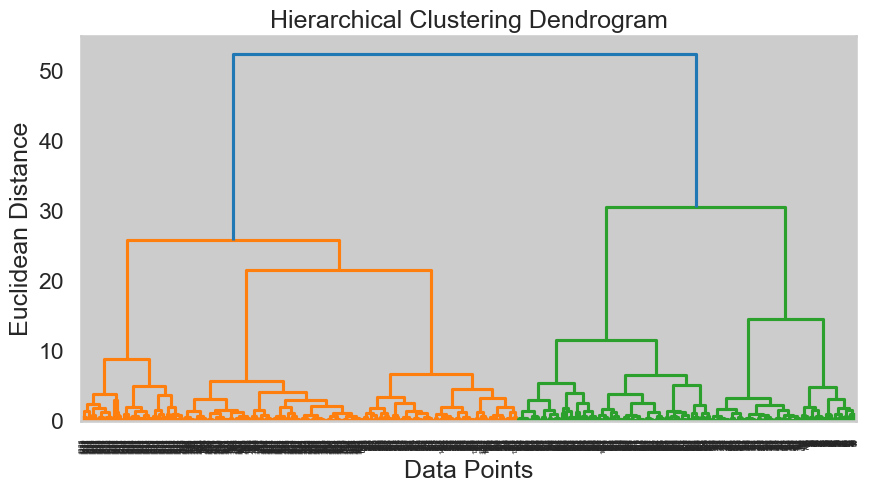

In [147]:
# 🔹 Plot Dendrogram for One Trial
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(scaled_df, metric='euclidean',method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

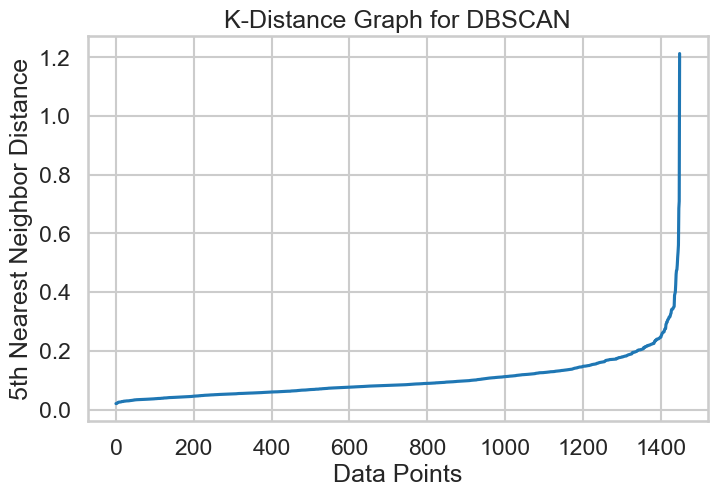

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# --- K-Distance Graph (for optimal EPS selection) ---
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, _ = neighbors_fit.kneighbors(scaled_df)
distances = np.sort(distances[:, 4])  # Get the 5th nearest neighbor distance

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

Best DBSCAN Model: {'eps': 0.23333333333333334, 'min_samples': 9, 'num_clusters': 2}
Best Silhouette Score: 0.3114


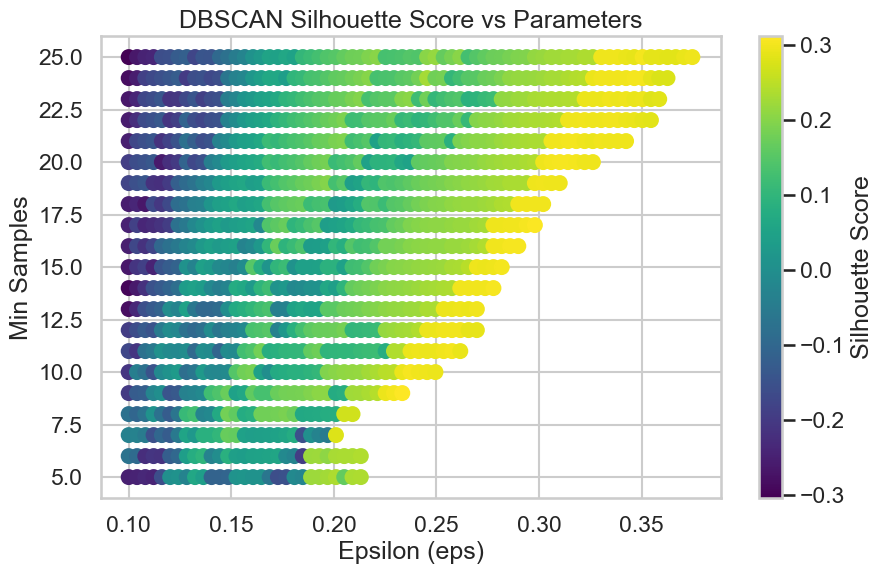

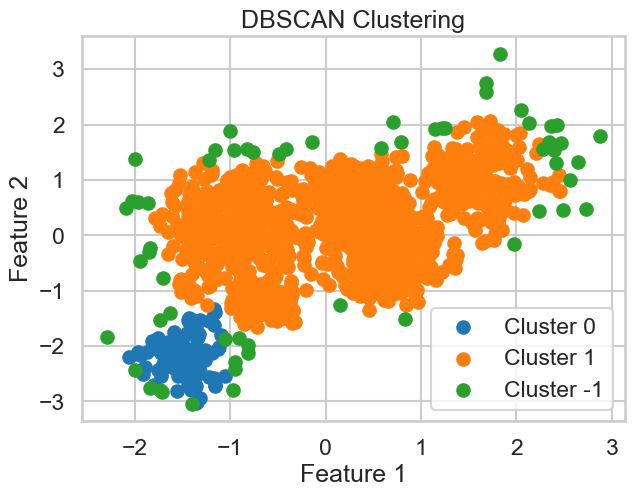

In [35]:

# Define parameter search space
eps_values = np.linspace(0.1, 0.5, 100)
# 100 values between 0.1 and 3
min_samples_values = range(5, 26)  # From 5 to 25

best_score = -1
best_params = {}

silhouette_scores = {}

# Iterate over different values of EPS and Min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_df)

        # Ignore noise points (-1 label)
        unique_clusters = set(labels)
        if -1 in unique_clusters:
            unique_clusters.remove(-1)
        num_clusters = len(unique_clusters)

        # Ensure valid clustering (at least 2 clusters)
        if num_clusters < 2:
            continue  

        # Compute silhouette score
        score = silhouette_score(scaled_df, labels)
        silhouette_scores[(eps, min_samples)] = score

        # Store best model parameters
        if score > best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples, "num_clusters": num_clusters}

# Print best model parameters
print(f"Best DBSCAN Model: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")

# --- Plot Silhouette Score vs EPS and Min_samples ---
plt.figure(figsize=(10, 6))

x_vals = [k[0] for k in silhouette_scores.keys()]  # Epsilon values
y_vals = [k[1] for k in silhouette_scores.keys()]  # Min_samples values
z_vals = list(silhouette_scores.values())  # Silhouette scores

# 2D scatter plot with color representing silhouette score
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100)
plt.colorbar(scatter, label="Silhouette Score")  # Add color legend
plt.xlabel("Epsilon (eps)")
plt.ylabel("Min Samples")
plt.title("DBSCAN Silhouette Score vs Parameters")
plt.show()


# Train DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels = best_dbscan.fit_predict(scaled_df)

# --- Plot Clusters ---
plt.figure(figsize=(7, 5))
unique_labels = set(labels)
for label in unique_labels:
    plt.scatter(scaled_df[labels == label, 0], scaled_df[labels == label, 1], label=f'Cluster {label}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


## 1st dataset best is kmeans 

## --------------------------------------------------

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


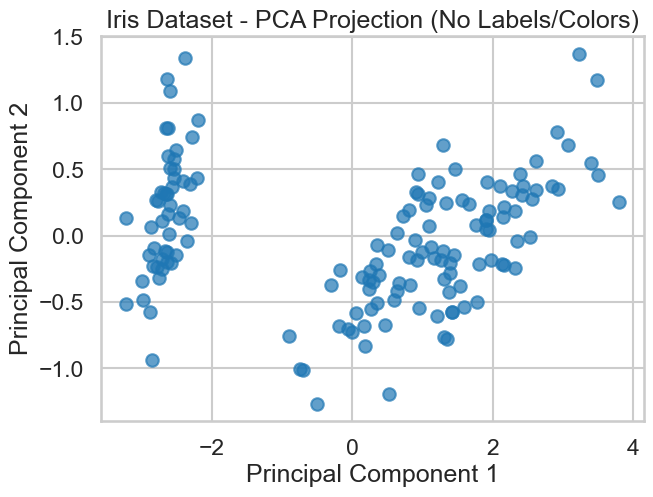

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
scaled_df=df
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Plot PCA-transformed data without labels or colors
plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Dataset - PCA Projection (No Labels/Colors)")
plt.show()

scaled_df.corr()

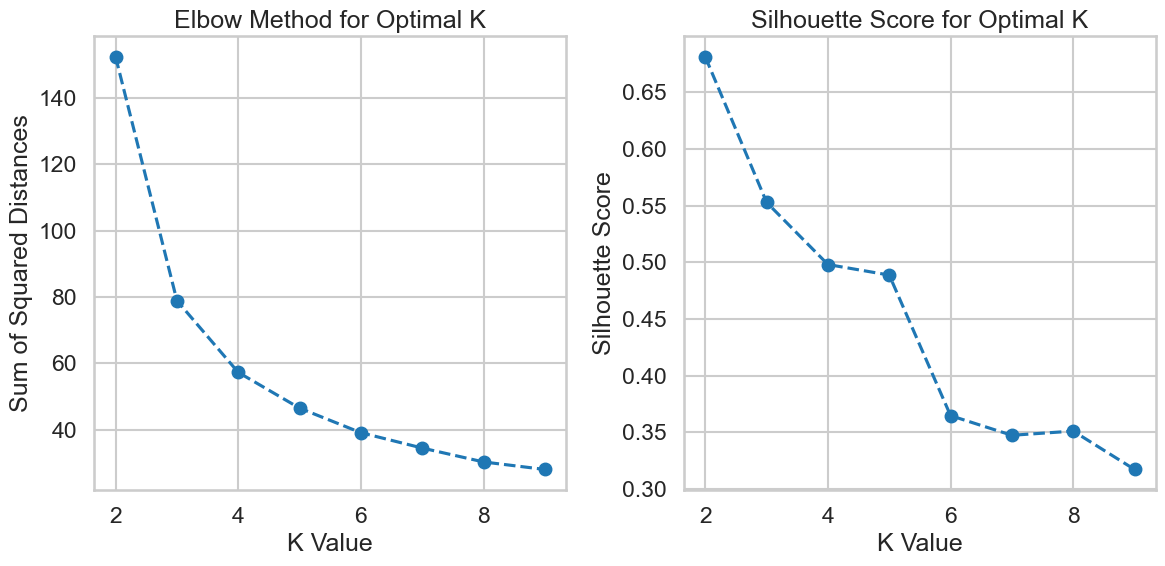

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ssd = []
silhouette_scores = []

# Your code here
for k in range(2, 10):
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(scaled_df)
    
    # Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    
    # Calculate silhouette score
    labels = model.labels_
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# Plot SSD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal K")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")

plt.tight_layout()
plt.show()

Silhouette Score for K-Means++ (K=3): 0.5528


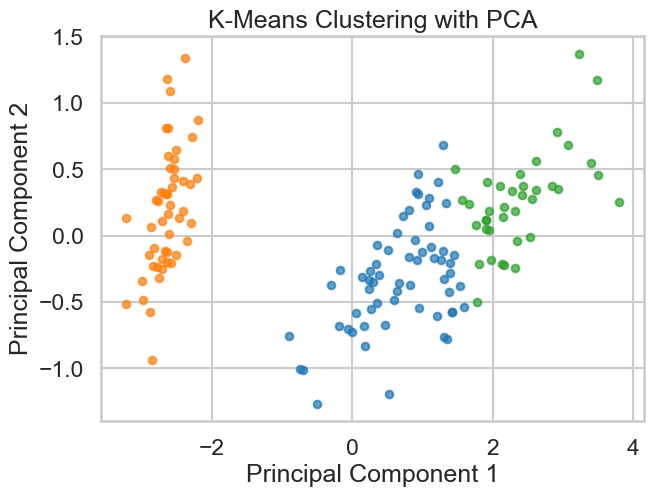

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Train K-Means++ with optimal K
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++')
kmeans.fit(scaled_df)

# Get cluster labels
labels = kmeans.labels_

# Compute Silhouette Score
silhouette = silhouette_score(scaled_df, labels)
print(f"Silhouette Score for K-Means++ (K={k_optimal}): {silhouette:.4f}")

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
scaled_df_pca = pca.fit_transform(scaled_df)

# Convert labels to NumPy array for proper indexing
labels = np.array(labels)

# Plot clusters without centroids
plt.figure(figsize=(7, 5))
for i in range(k_optimal):
    plt.scatter(scaled_df_pca[labels == i, 0], scaled_df_pca[labels == i, 1], alpha=0.7, s=30)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with PCA")
plt.show()


Best Agglomerative Clustering Model: {'distance_threshold': 4.0, 'affinity': 'euclidean', 'linkage': 'average', 'num_clusters': 2}
Best Silhouette Score: 0.6867
Number of Clusters in Best Model: 2


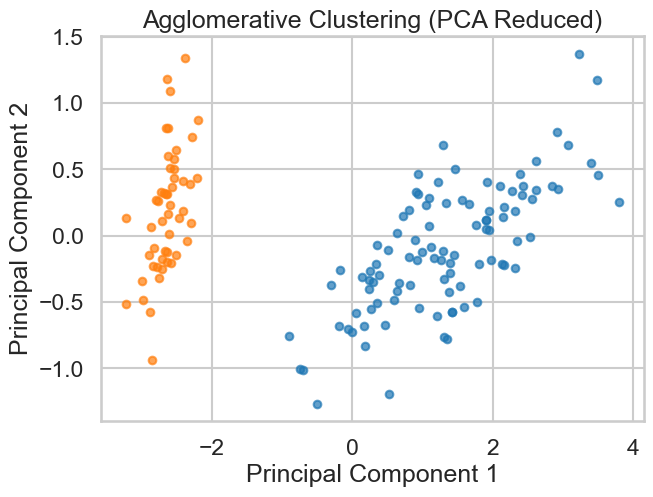

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Define parameter search space
affinity_list = ["euclidean", "manhattan", "cosine"]
linkage_list = ["ward", "average", "complete", "single"]
distance_thresholds = np.linspace(4, 14, 30)  # 15 different thresholds

# Store best parameters
best_score = -1
best_params = {}

# Iterate over different configurations
for distance_threshold in distance_thresholds:
    for affinity in affinity_list:
        for linkage in linkage_list:
            if linkage == "ward" and affinity != "euclidean":
                continue  
            
            # Fit Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=None, 
                                            distance_threshold=distance_threshold,
                                            affinity=affinity, 
                                            linkage=linkage)
            labels = model.fit_predict(scaled_df)
            
            # Count number of clusters
            num_clusters = len(set(labels))
            
            # Skip invalid clustering results
            if num_clusters <= 1:
                continue
            
            # Compute Silhouette Score
            silhouette = silhouette_score(scaled_df, labels)

            # Update best model
            if silhouette > best_score:
                best_score = silhouette
                best_params = {
                    "distance_threshold": distance_threshold, 
                    "affinity": affinity, 
                    "linkage": linkage,
                    "num_clusters": num_clusters
                }

# Print best model parameters and number of clusters
print(f"Best Agglomerative Clustering Model: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Number of Clusters in Best Model: {best_params['num_clusters']}")

# Store the best silhouette score for comparison
best_hierarchical_score = best_score

# Train best model
best_model = AgglomerativeClustering(n_clusters=None, 
                                     distance_threshold=best_params["distance_threshold"],  
                                     affinity=best_params["affinity"], 
                                     linkage=best_params["linkage"])
labels = best_model.fit_predict(scaled_df)



# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
scaled_df_pca = pca.fit_transform(scaled_df)

# Convert labels to NumPy array for proper indexing
labels = np.array(labels)

# 🔹 Plot Clusters in PCA Space
plt.figure(figsize=(7, 5))
for i in range(best_params["num_clusters"]):
    plt.scatter(scaled_df_pca[labels == i, 0], scaled_df_pca[labels == i, 1], alpha=0.7, s=30)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering (PCA Reduced)")
plt.show()


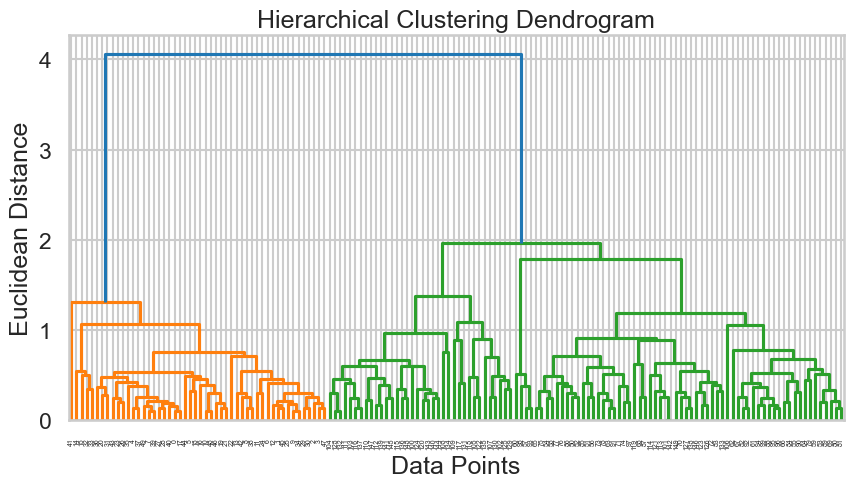

In [158]:
# 🔹 Plot Dendrogram for One Trial
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(scaled_df, metric='euclidean',method='average'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

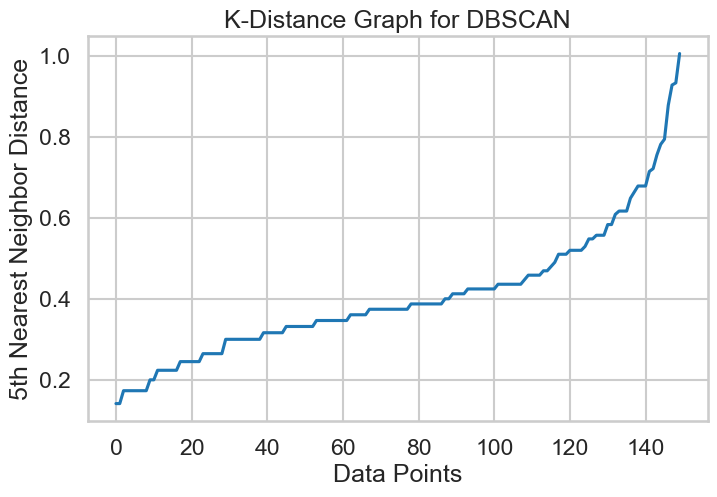

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# --- K-Distance Graph (for optimal EPS selection) ---
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_df)
distances, _ = neighbors_fit.kneighbors(scaled_df)
distances = np.sort(distances[:, 4])  # Get the 5th nearest neighbor distance

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

Best DBSCAN Model: {'eps': 0.5765100671140939, 'min_samples': 6, 'num_clusters': 2}
Best Silhouette Score: 0.5456


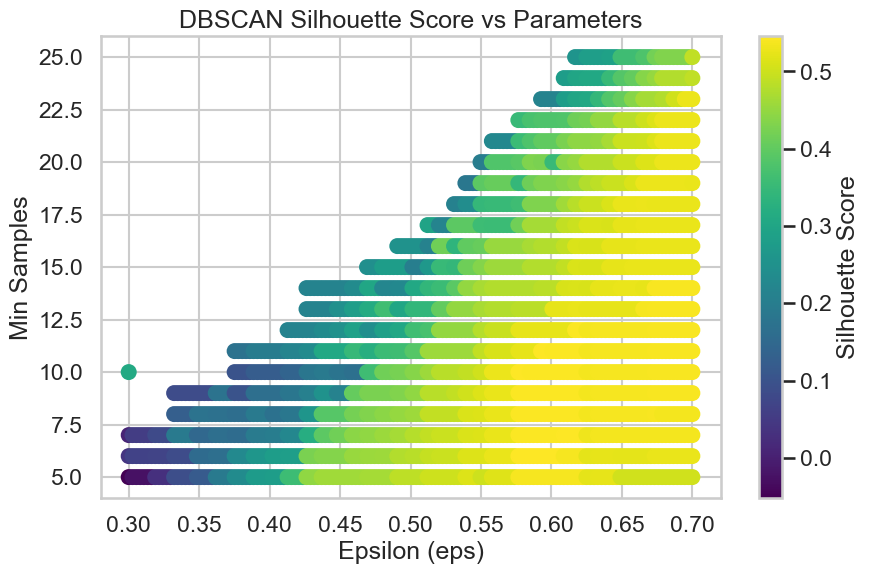

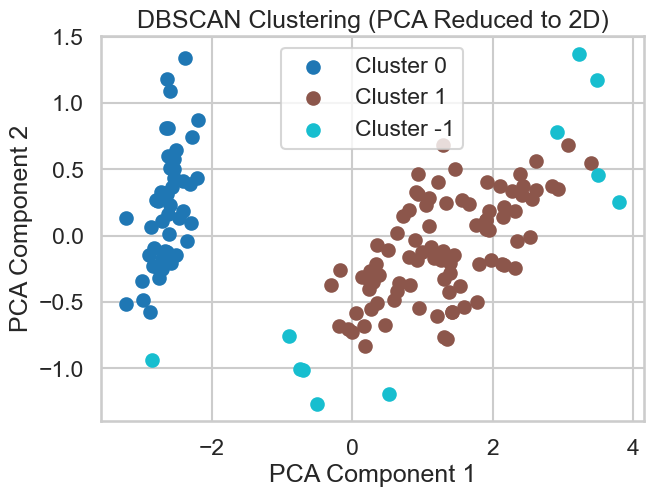

In [162]:

# Define parameter search space
eps_values = np.linspace(0.3, 0.7, 150)
# 100 values between 0.1 and 3
min_samples_values = range(5, 26)  # From 5 to 25

best_score = -1
best_params = {}

silhouette_scores = {}

# Iterate over different values of EPS and Min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_df)

        # Ignore noise points (-1 label)
        unique_clusters = set(labels)
        if -1 in unique_clusters:
            unique_clusters.remove(-1)
        num_clusters = len(unique_clusters)

        # Ensure valid clustering (at least 2 clusters)
        if num_clusters < 2:
            continue  

        # Compute silhouette score
        score = silhouette_score(scaled_df, labels)
        silhouette_scores[(eps, min_samples)] = score

        # Store best model parameters
        if score > best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples, "num_clusters": num_clusters}

# Print best model parameters
print(f"Best DBSCAN Model: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")

# --- Plot Silhouette Score vs EPS and Min_samples ---
plt.figure(figsize=(10, 6))

x_vals = [k[0] for k in silhouette_scores.keys()]  # Epsilon values
y_vals = [k[1] for k in silhouette_scores.keys()]  # Min_samples values
z_vals = list(silhouette_scores.values())  # Silhouette scores

# 2D scatter plot with color representing silhouette score
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100)
plt.colorbar(scatter, label="Silhouette Score")  # Add color legend
plt.xlabel("Epsilon (eps)")
plt.ylabel("Min Samples")
plt.title("DBSCAN Silhouette Score vs Parameters")
plt.show()




# --- Plot Clusters ---
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Train DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels = best_dbscan.fit_predict(scaled_df)

# --- Plot Clusters in 2D (After PCA) ---
plt.figure(figsize=(7, 5))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Assign colors

for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1], color=color, label=f'Cluster {label}')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (PCA Reduced to 2D)")
plt.legend()
plt.show()



## best (without scaling) is kmeans because it is logical to be 3 clusters 

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(scaled_df)

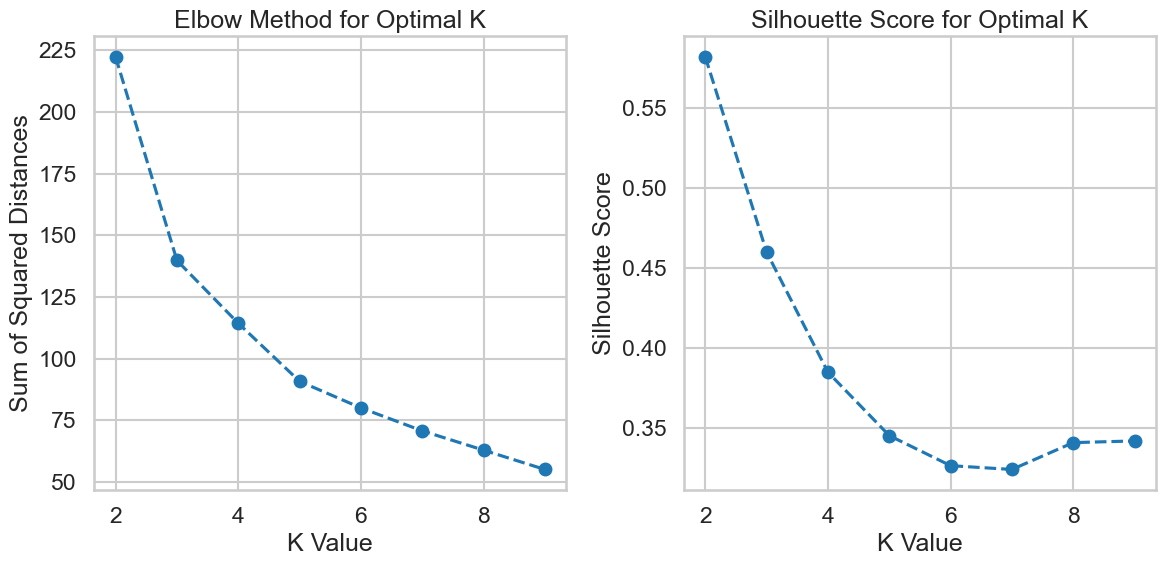

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ssd = []
silhouette_scores = []

# Your code here
for k in range(2, 10):
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(scaled_df)
    
    # Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    
    # Calculate silhouette score
    labels = model.labels_
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# Plot SSD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal K")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")

plt.tight_layout()
plt.show()

Silhouette Score for K-Means++ (K=3): 0.4599


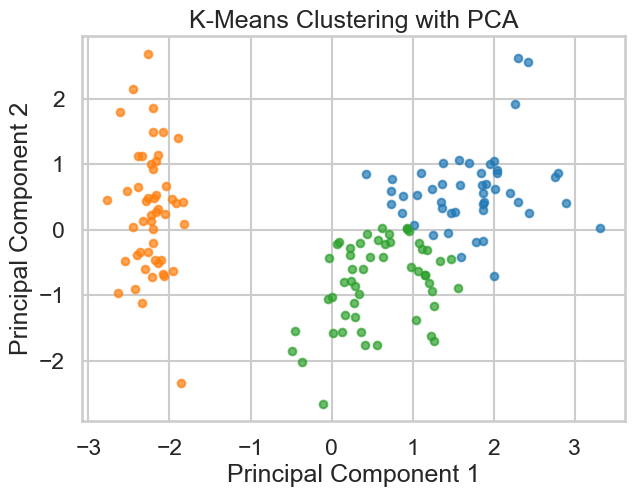

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Train K-Means++ with optimal K
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++')
kmeans.fit(scaled_df)

# Get cluster labels
labels = kmeans.labels_

# Compute Silhouette Score
silhouette = silhouette_score(scaled_df, labels)
print(f"Silhouette Score for K-Means++ (K={k_optimal}): {silhouette:.4f}")

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
scaled_df_pca = pca.fit_transform(scaled_df)

# Convert labels to NumPy array for proper indexing
labels = np.array(labels)

# Plot clusters without centroids
plt.figure(figsize=(7, 5))
for i in range(k_optimal):
    plt.scatter(scaled_df_pca[labels == i, 0], scaled_df_pca[labels == i, 1], alpha=0.7, s=30)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with PCA")
plt.show()


Best Agglomerative Clustering Model: {'distance_threshold': 3.5789473684210527, 'affinity': 'euclidean', 'linkage': 'average', 'num_clusters': 2}
Best Silhouette Score: 0.5818
Number of Clusters in Best Model: 2


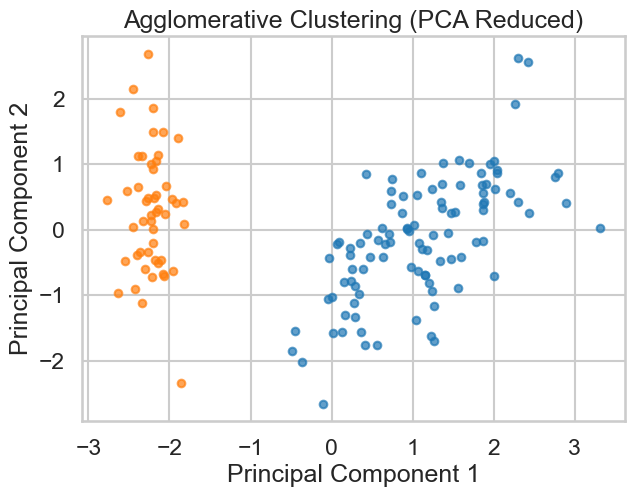

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Define parameter search space
affinity_list = ["euclidean", "manhattan", "cosine"]
linkage_list = ["ward", "average", "complete", "single"]
distance_thresholds = np.linspace(3, 14, 20)  # 15 different thresholds

# Store best parameters
best_score = -1
best_params = {}

# Iterate over different configurations
for distance_threshold in distance_thresholds:
    for affinity in affinity_list:
        for linkage in linkage_list:
            if linkage == "ward" and affinity != "euclidean":
                continue  
            
            # Fit Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=None, 
                                            distance_threshold=distance_threshold,
                                            affinity=affinity, 
                                            linkage=linkage)
            labels = model.fit_predict(scaled_df)
            
            # Count number of clusters
            num_clusters = len(set(labels))
            
            # Skip invalid clustering results
            if num_clusters <= 1:
                continue
            
            # Compute Silhouette Score
            silhouette = silhouette_score(scaled_df, labels)

            # Update best model
            if silhouette > best_score:
                best_score = silhouette
                best_params = {
                    "distance_threshold": distance_threshold, 
                    "affinity": affinity, 
                    "linkage": linkage,
                    "num_clusters": num_clusters
                }

# Print best model parameters and number of clusters
print(f"Best Agglomerative Clustering Model: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Number of Clusters in Best Model: {best_params['num_clusters']}")

# Store the best silhouette score for comparison
best_hierarchical_score = best_score

# Train best model
best_model = AgglomerativeClustering(n_clusters=None, 
                                     distance_threshold=best_params["distance_threshold"],  
                                     affinity=best_params["affinity"], 
                                     linkage=best_params["linkage"])
labels = best_model.fit_predict(scaled_df)



# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
scaled_df_pca = pca.fit_transform(scaled_df)

# Convert labels to NumPy array for proper indexing
labels = np.array(labels)

# 🔹 Plot Clusters in PCA Space
plt.figure(figsize=(7, 5))
for i in range(best_params["num_clusters"]):
    plt.scatter(scaled_df_pca[labels == i, 0], scaled_df_pca[labels == i, 1], alpha=0.7, s=30)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering (PCA Reduced)")
plt.show()


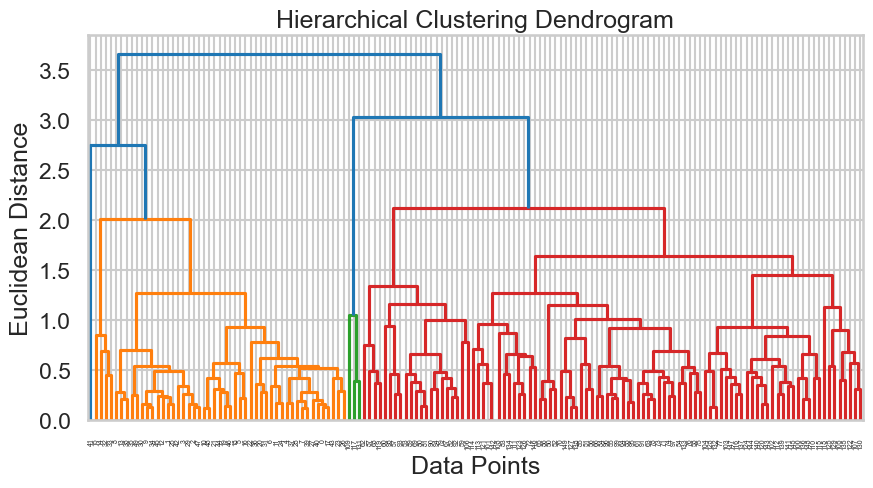

In [168]:
# 🔹 Plot Dendrogram for One Trial
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(scaled_df, metric='euclidean',method='average'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

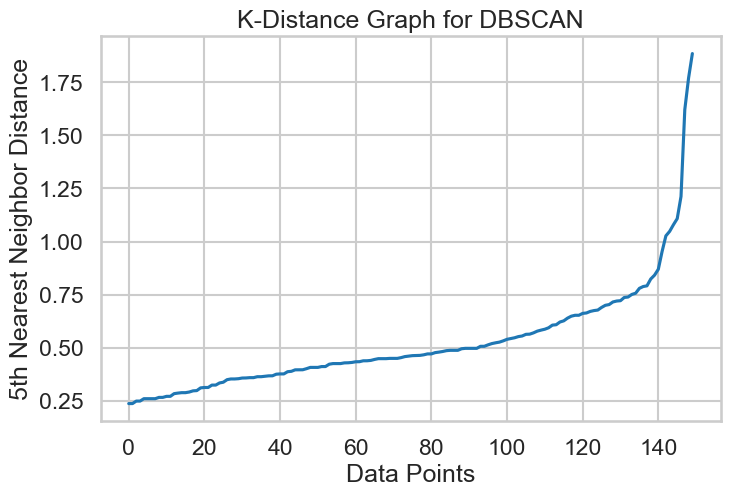

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# --- K-Distance Graph (for optimal EPS selection) ---
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_df)
distances, _ = neighbors_fit.kneighbors(scaled_df)
distances = np.sort(distances[:, 4])  # Get the 5th nearest neighbor distance

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

Best DBSCAN Model: {'eps': 1.0798657718120805, 'min_samples': 5, 'num_clusters': 2}
Best Silhouette Score: 0.5518


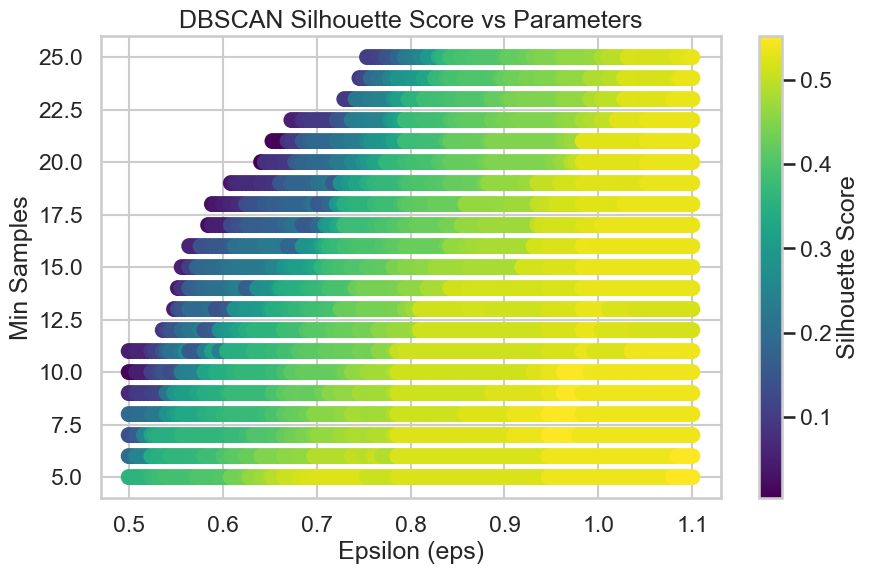

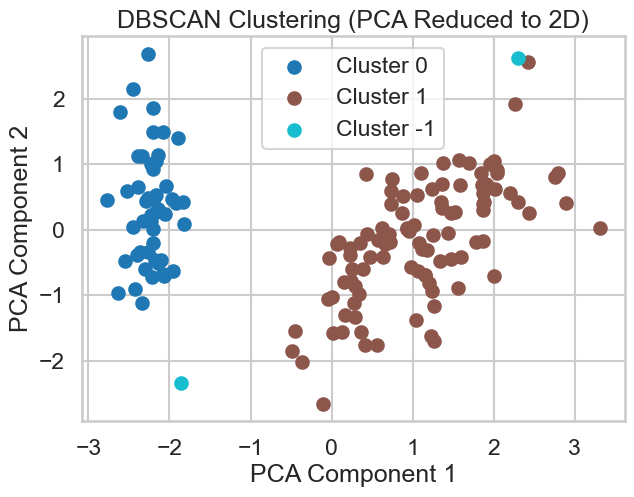

In [170]:

# Define parameter search space
eps_values = np.linspace(0.5, 1.1, 150)
# 100 values between 0.1 and 3
min_samples_values = range(5, 26)  # From 5 to 25

best_score = -1
best_params = {}

silhouette_scores = {}

# Iterate over different values of EPS and Min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_df)

        # Ignore noise points (-1 label)
        unique_clusters = set(labels)
        if -1 in unique_clusters:
            unique_clusters.remove(-1)
        num_clusters = len(unique_clusters)

        # Ensure valid clustering (at least 2 clusters)
        if num_clusters < 2:
            continue  

        # Compute silhouette score
        score = silhouette_score(scaled_df, labels)
        silhouette_scores[(eps, min_samples)] = score

        # Store best model parameters
        if score > best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples, "num_clusters": num_clusters}

# Print best model parameters
print(f"Best DBSCAN Model: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")

# --- Plot Silhouette Score vs EPS and Min_samples ---
plt.figure(figsize=(10, 6))

x_vals = [k[0] for k in silhouette_scores.keys()]  # Epsilon values
y_vals = [k[1] for k in silhouette_scores.keys()]  # Min_samples values
z_vals = list(silhouette_scores.values())  # Silhouette scores

# 2D scatter plot with color representing silhouette score
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100)
plt.colorbar(scatter, label="Silhouette Score")  # Add color legend
plt.xlabel("Epsilon (eps)")
plt.ylabel("Min Samples")
plt.title("DBSCAN Silhouette Score vs Parameters")
plt.show()




# --- Plot Clusters ---
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Train DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels = best_dbscan.fit_predict(scaled_df)

# --- Plot Clusters in 2D (After PCA) ---
plt.figure(figsize=(7, 5))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Assign colors

for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1], color=color, label=f'Cluster {label}')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (PCA Reduced to 2D)")
plt.legend()
plt.show()



* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

## Customer dataset
Repeat all the above on the customer data set 

In [179]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Customer_data.csv")

# Display basic info and first few rows
print(df.info())  # Shows column names, data types, and missing values
df.head()  # Displays the first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [181]:
df.corr()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [183]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [185]:
import pandas as pd


df = df.drop(columns=['ID'])

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler (default scales to range [0,1])
scaler = MinMaxScaler()

# Fit and transform the dataset
scaled_df = scaler.fit_transform(df)  # Replace 'df' with your actual DataFrame or array

# If using Pandas DataFrame

scaled_df  # View the first few rows of scaled data


array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

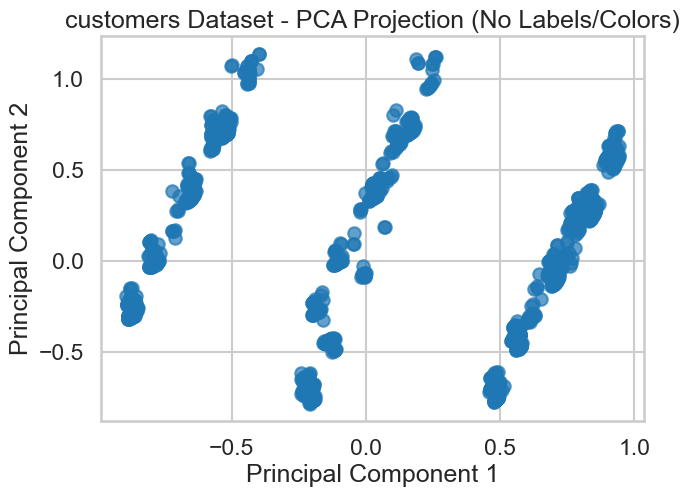

In [187]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)

# Plot PCA-transformed data without labels or colors
plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("customers Dataset - PCA Projection (No Labels/Colors)")
plt.show()

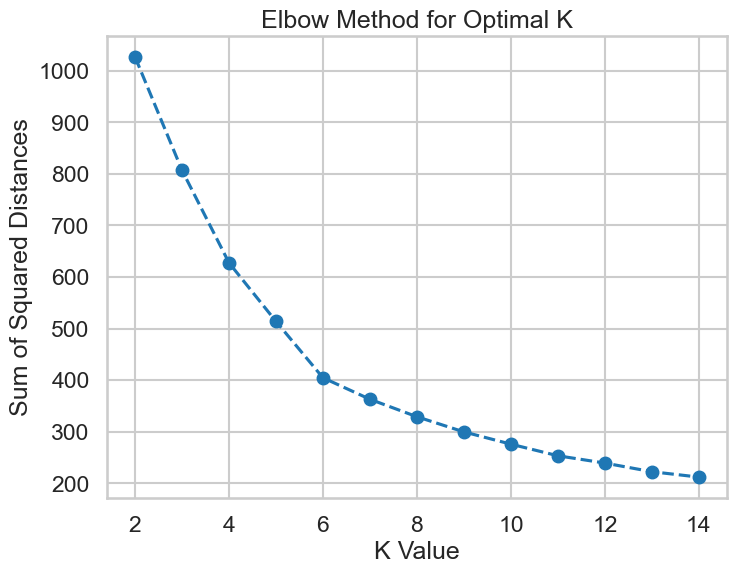

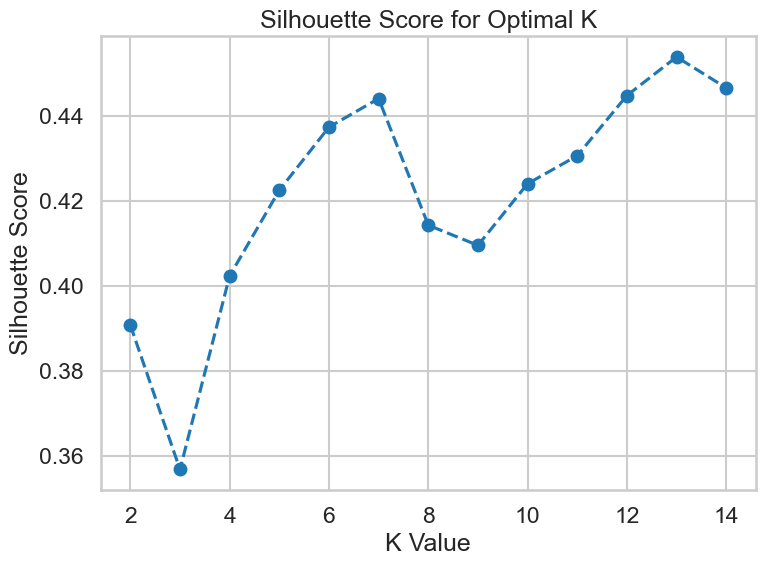

In [189]:

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ssd = []
silhouette_scores = []

# Your code here
for k in range(2, 15):
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(scaled_df)
    
    # Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    
    # Calculate silhouette score
    labels = model.labels_
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# Plot SSD
plt.figure(figsize=(8,6))

plt.plot(range(2, 15), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal K")

# Plot Silhouette Score
plt.figure(figsize=(8, 6))

plt.plot(range(2, 15), silhouette_scores, 'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")

plt.tight_layout()
plt.show()

Silhouette Score for K-Means++ (K=6): 0.4465


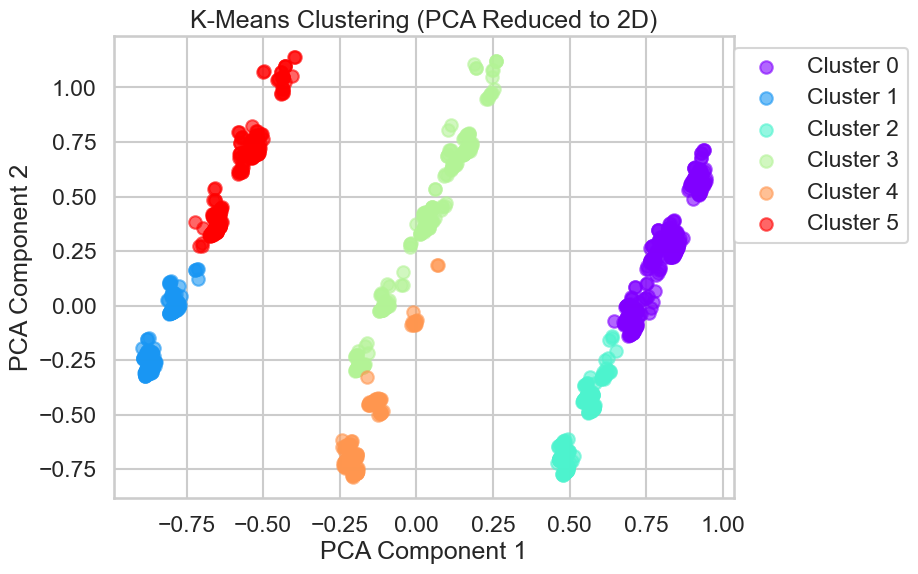

In [191]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Define optimal K
k_optimal = 6
# Compute Silhouette Score
silhouette = silhouette_score(scaled_df, labels)
print(f"Silhouette Score for K-Means++ (K={k_optimal}): {silhouette:.4f}")

# Train K-Means++ with optimal K
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
labels = kmeans.fit_predict(scaled_df)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Plot PCA-reduced clusters
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, k_optimal))

for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(pca_data[mask, 0], pca_data[mask, 1], color=[color], label=f"Cluster {label}", alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (PCA Reduced to 2D)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))  # Move legend outside
plt.show()


Best Agglomerative Clustering Model: {'distance_threshold': 16.60759493670886, 'affinity': 'euclidean', 'linkage': 'ward', 'num_clusters': 4}
Best Silhouette Score: 0.4036
Number of Clusters in Best Model: 4


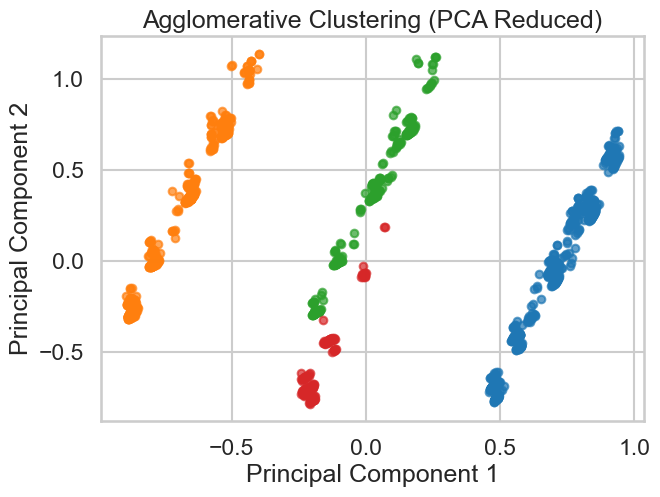

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Define parameter search space
affinity_list = ["euclidean", "manhattan", "cosine"]
linkage_list = ["ward", "average", "complete", "single"]
distance_thresholds = np.linspace(7, 30, 80)  # 15 different thresholds

# Store best parameters
best_score = -1
best_params = {}

# Iterate over different configurations
for distance_threshold in distance_thresholds:
    for affinity in affinity_list:
        for linkage in linkage_list:
            if linkage == "ward" and affinity != "euclidean":
                continue  
            
            # Fit Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=None, 
                                            distance_threshold=distance_threshold,
                                            affinity=affinity, 
                                            linkage=linkage)
            labels = model.fit_predict(scaled_df)
            
            # Count number of clusters
            num_clusters = len(set(labels))
            
            # Skip invalid clustering results
            if num_clusters <= 1:
                continue
            
            # Compute Silhouette Score
            silhouette = silhouette_score(scaled_df, labels)

            # Update best model
            if silhouette > best_score:
                best_score = silhouette
                best_params = {
                    "distance_threshold": distance_threshold, 
                    "affinity": affinity, 
                    "linkage": linkage,
                    "num_clusters": num_clusters
                }

# Print best model parameters and number of clusters
print(f"Best Agglomerative Clustering Model: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Number of Clusters in Best Model: {best_params['num_clusters']}")

# Store the best silhouette score for comparison
best_hierarchical_score = best_score

# Train best model
best_model = AgglomerativeClustering(n_clusters=None, 
                                     distance_threshold=best_params["distance_threshold"],  
                                     affinity=best_params["affinity"], 
                                     linkage=best_params["linkage"])
labels = best_model.fit_predict(scaled_df)



# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
scaled_df_pca = pca.fit_transform(scaled_df)

# Convert labels to NumPy array for proper indexing
labels = np.array(labels)

# 🔹 Plot Clusters in PCA Space
plt.figure(figsize=(7, 5))
for i in range(best_params["num_clusters"]):
    plt.scatter(scaled_df_pca[labels == i, 0], scaled_df_pca[labels == i, 1], alpha=0.7, s=30)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering (PCA Reduced)")
plt.show()


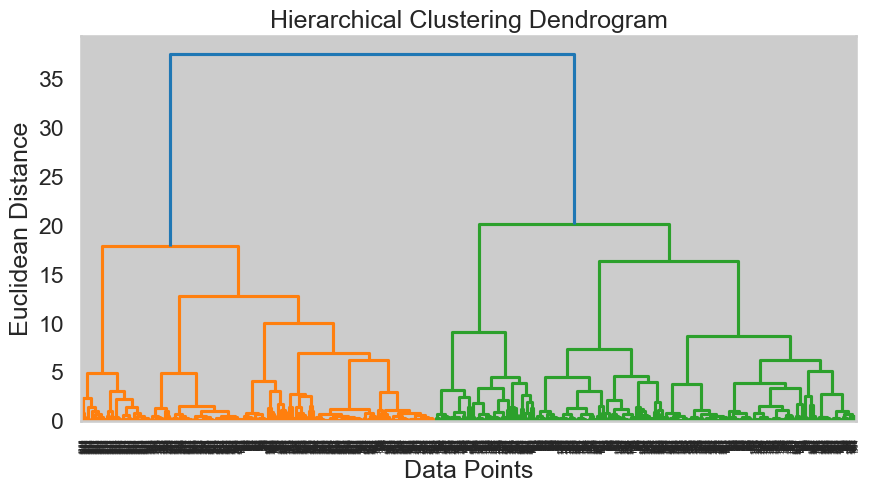

In [203]:
# 🔹 Plot Dendrogram for One Trial
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(scaled_df, metric='euclidean',method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [205]:
# If using Pandas DataFrame
scaled_df1 = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df1.head()  # View the first few rows of scaled data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


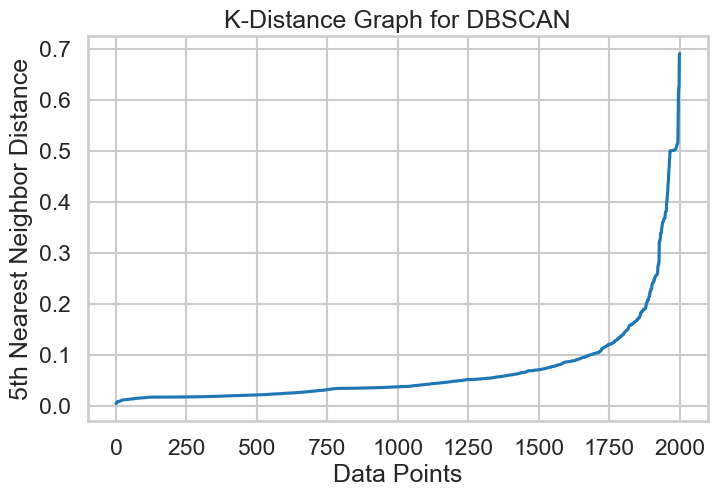

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# --- K-Distance Graph (for optimal EPS selection) ---
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_df)
distances, _ = neighbors_fit.kneighbors(scaled_df)
distances = np.sort(distances[:, 4])  # Get the 5th nearest neighbor distance

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

Best DBSCAN Model: {'eps': 0.552542372881356, 'min_samples': 5, 'num_clusters': 4}
Best Davies-Bouldin Index: 0.9257


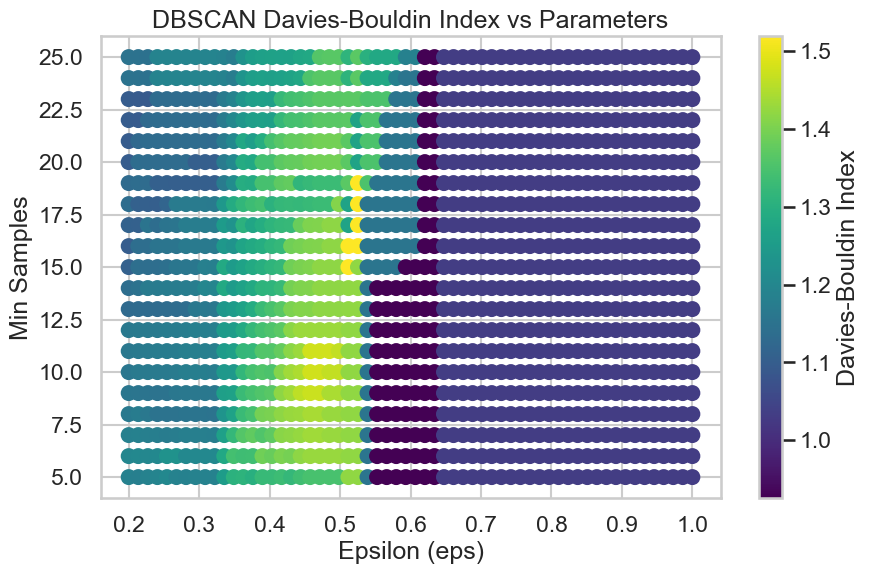

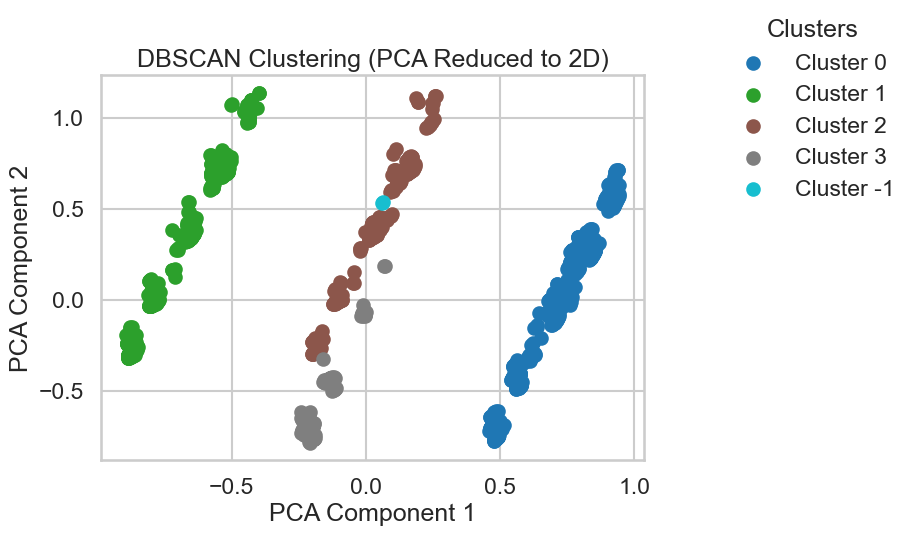

In [221]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define parameter search space
eps_values = np.linspace(0.2, 1, 60)
min_samples_values = range(5, 26)  # From 5 to 25

best_score = float('inf')  # Lower DBI is better
best_params = {}

dbi_scores = {}

# Iterate over different values of EPS and Min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_df)

        # Ignore noise points (-1 label)
        unique_clusters = set(labels)
        if -1 in unique_clusters:
            unique_clusters.remove(-1)
        num_clusters = len(unique_clusters)

        # Ensure valid clustering (at least 2 clusters)
        if num_clusters < 2:
            continue  

        # Compute Davies-Bouldin Index
        score = davies_bouldin_score(scaled_df, labels)
        dbi_scores[(eps, min_samples)] = score

        # Store best model parameters (lower DBI is better)
        if score < best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples, "num_clusters": num_clusters}

# Print best model parameters
print(f"Best DBSCAN Model: {best_params}")
print(f"Best Davies-Bouldin Index: {best_score:.4f}")

# --- Plot DBI Score vs EPS and Min_samples ---
plt.figure(figsize=(10, 6))

x_vals = [k[0] for k in dbi_scores.keys()]  # Epsilon values
y_vals = [k[1] for k in dbi_scores.keys()]  # Min_samples values
z_vals = list(dbi_scores.values())  # DBI scores

# 2D scatter plot with color representing DBI score
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100)
plt.colorbar(scatter, label="Davies-Bouldin Index")  # Add color legend
plt.xlabel("Epsilon (eps)")
plt.ylabel("Min Samples")
plt.title("DBSCAN Davies-Bouldin Index vs Parameters")
plt.show()

# --- Plot Clusters ---
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Train DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels = best_dbscan.fit_predict(scaled_df)

# --- Plot Clusters in 2D (After PCA) ---
# --- Plot Clusters in 2D (After PCA) ---
plt.figure(figsize=(7, 5))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Assign colors

for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1], color=color, label=f'Cluster {label}')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (PCA Reduced to 2D)")

# Adjust legend position to avoid overlap
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2), title="Clusters", frameon=False)

# Show plot with adjusted legend
plt.show()


In [211]:
from sklearn.metrics import silhouette_score

# Extract non-noise points (ignore label -1)
valid_mask = labels != -1
valid_data = scaled_df[valid_mask]  # Data points that are not noise
valid_labels = labels[valid_mask]   # Corresponding cluster labels

# Ensure we have at least 2 clusters
if len(set(valid_labels)) > 1:
    silhouette_avg = silhouette_score(valid_data, valid_labels)
    print(f"Silhouette Score for Best DBSCAN Clusters: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed (only one valid cluster found).")


Silhouette Score for Best DBSCAN Clusters: 0.4037
